In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c arabic-letters-classification

100% 197M/197M [00:01<00:00, 135MB/s]
100% 197M/197M [00:01<00:00, 114MB/s]


In [ ]:
!unzip arabic-letters-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user032_waw_regular_023.png  
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user032_waw_regular_024.png  
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user032_waw_regular_025.png  
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user032_waw_regular_026.png  
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user032_waw_regular_027.png  
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user032_waw_regular_028.png  
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user033_waw_regular_021.png  
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user033_waw_regular_023.png  
  inflating: Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train/60/user033_waw_regular_024.p

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models,regularizers
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

IMG_SIZE = (100, 100)


In [ ]:
def load_data(directory):
    images, labels = [], []
    class_dir = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]


    for label, class_dir_name in enumerate(class_dir):
        class_dir = os.path.join(directory, class_dir_name)
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
            img = img_to_array(img) / 255.0
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
train_dir = '/content/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train'
test_dir = '/content/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test'


X, y = load_data(train_dir)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,        # Reduced rotation
    width_shift_range=0.1,    # Reduced horizontal shift
    height_shift_range=0.1,   # Reduced vertical shift
    zoom_range=0.1,           # Reduced zoom
    shear_range=0.1,          # Reduced shear
    fill_mode='nearest'       # Handle empty areas during transformations
)
datagen.fit(X_train)

In [ ]:
initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100,  # Decay more frequently
    decay_rate=0.9,   # Faster decay
    staircase=True
)

In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(65, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(X_val, y_val),
                    callbacks=[ reduce_lr])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1134s 1s/step - accuracy: 0.0574 - loss: 5.5966 - val_accuracy: 0.2437 - val_loss: 4.1710 - learning_rate: 1.0000e-04
Epoch 2/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1164s 1s/step - accuracy: 0.1914 - loss: 4.3631 - val_accuracy: 0.2770 - val_loss: 3.7112 - learning_rate: 1.0000e-04
Epoch 3/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1178s 1s/step - accuracy: 0.3264 - loss: 3.5811 - val_accuracy: 0.4588 - val_loss: 2.9881 - learning_rate: 1.0000e-04
Epoch 4/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1165s 1s/step - accuracy: 0.4397 - loss: 2.9998 - val_accuracy: 0.3779 - val_loss: 3.7040 - learning_rate: 1.0000e-04
Epoch 5/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1161s 1s/step - accuracy: 0.5173 - loss: 2.5976 - val_accuracy: 0.6041 - val_loss: 2.2729 - learning_rate: 1.0000e-04
Epoch 6/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1172s 1s/step - accuracy: 0.5881 - loss: 2.2859 - val_accuracy: 0.2380 - val_loss: 6.0461 - learning_rate: 1.0000e-04
Epoch 7/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1135s 1s/

In [ ]:

import os
test_images = []
test_files = os.listdir(test_dir)
for file in test_files:
    img_path = os.path.join(test_dir, file)
    img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
    img = img_to_array(img) / 255.0
    test_images.append(img)

test_images = np.array(test_images)
predictions = model.predict(test_images)

# Map predictions to labels

333/333 ━━━━━━━━━━━━━━━━━━━━ 73s 217ms/step


In [ ]:

model.save('arabic_handwritten_model.h5')

In [ ]:

test_images = []
test_files = os.listdir(test_dir)
for file in test_files:
    img_path = os.path.join(test_dir, file)
    img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
    img = img_to_array(img) / 255.0
    test_images.append(img)

test_images = np.array(test_images)
predictions = model.predict(test_images)

# Map predictions to labels
predicted_labels = np.argmax(predictions, axis=1)

333/333 ━━━━━━━━━━━━━━━━━━━━ 73s 220ms/step


In [ ]:
# Save predictions to a file
with open('predictions.txt', 'w') as f:
    for file, label in zip(test_files, predicted_labels):
        f.write(f'{file},{label}\n')

In [ ]:
# Function to predict the label of a single image
def predict_image(model, img_path):
    img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return np.argmax(prediction, axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


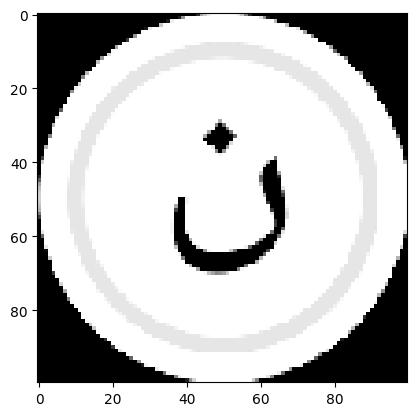

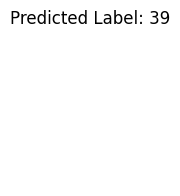

In [ ]:
import matplotlib.pyplot as plt

# Function to predict and plot the image with its label
def predict_and_plot_image(model, img_path):
    img = load_img(img_path, target_size=IMG_SIZE, color_mode='grayscale')
    img_array = img_to_array(img) / 255.0  # Preprocess image for prediction
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict using model
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction, axis=1)[0]

    # Plot image using Matplotlib
    plt.imshow(img, cmap='gray')  # Display the image
    plt.figure(figsize=(2, 2))
    plt.title(f"Predicted Label: {predicted_label}")  # Set the title with prediction
    plt.axis('off')  # Hide axis ticks
    plt.show()

# Example
example_img_path = '/content/images.png'
predict_and_plot_image(model, example_img_path)  # Call the function to display image and prediction